In [6]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess
import nolds
import scipy.optimize

####Set up network weights
a = 16
b = 12
d = 4
e = -2
W = np.array([[a, 0, -b, 0], [0, a, 0, -b],
              [a, 0, -d, 0], [0, a, 0, -d]]) 
N = W.shape[0]
ps = [-1,-1,-4,-4]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [46]:
expn = 21
stabmat99 = np.zeros((expn,expn))

for i,expi in  enumerate(np.linspace(-10, 10, num=expn)):
    for j,ksdm in  enumerate(np.linspace(-10, 10, num=expn)):
        Wp = np.zeros((N,N))
        Wp[0,-1] = ksdm
        Wp[1,-2] = ksdm
        Wp[2,-3] = ksdm
        Wp[3,-4] = ksdm
        Wp[0,1] = expi
        Wp[1,0] = expi
        Wp[2,3] = expi
        Wp[3,2] = expi

        Ws = W + Wp
        
        def F(x):
            return -x+sigmoid(Ws.dot(x)+np.array(ps))
        try:
            x=scipy.optimize.broyden2(F, [.99]*4, f_tol=1e-15)
#             print("J eigenvals", np.where(np.real(np.linalg.eig(cf.jac(x,Ws,ps))[0])<0.)[0].shape[0])
            stabmat99[j,i] = np.where(np.real(np.linalg.eig(cf.jac(x,Ws,ps))[0])<0.)[0].shape[0]
        except:
            stabmat99[j,i] = -1

/home/abel/anaconda3/envs/atds/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


In [45]:
# stabmat

TypeError: colorbar() missing 1 required positional argument: 'mappable'

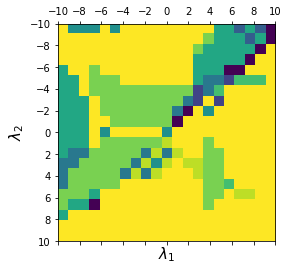

In [52]:
fig, ax = plt.subplots()
ax.matshow(stabmat01+stabmat99,extent=[-10,10,10,-10])
ax.set_xlabel(r"$\lambda_1$", fontsize=15)
ax.set_ylabel(r"$\lambda_2$", fontsize=15)
ax.set_xticks(np.linspace(-10,10,11))
ax.set_yticks(np.linspace(-10,10,11))
fig.colorbar()

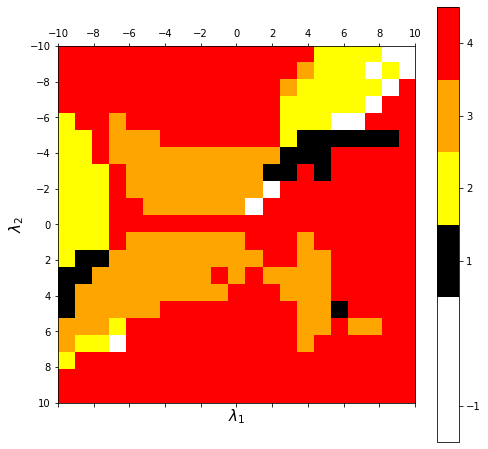

In [66]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
allcolors = ['w', 'k', 'yellow', 'orange', 'red']
cmap = ListedColormap(allcolors)
norm = mpl.colors.BoundaryNorm(np.arange(-1.5,5), cmap.N, cmap.N)

fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.matshow(stabmat01, cmap=cmap, norm=norm, extent=[-10,10,10,-10])

ax.set_xlabel(r"$\lambda_1$", fontsize=15)
ax.set_ylabel(r"$\lambda_2$", fontsize=15)
ax.set_xticks(np.linspace(-10,10,11))
ax.set_yticks(np.linspace(-10,10,11))

fig.colorbar(scatter, ticks=[-1,1,2,3,4])
plt.show()

In [74]:
np.where(stabmat01+stabmat99<0),np.where(stabmat99<0)[0].shape,np.where(stabmat01<0)[0].shape

((array([ 0,  1,  2,  3,  4,  4,  8,  9, 17]),
  array([20, 20, 19, 18, 16, 17, 12, 11,  3])),
 (28,),
 (11,))

In [88]:
i,j=1,18
np.array(stabmat01)[i,j],np.array(stabmat99)[i,j]

(-1.0, 2.0)

In [75]:
stabmat = stabmat01.copy()

In [89]:
stabmat[i,j] = 2.

In [87]:
np.where(stabmat01<0)

(array([ 0,  0,  1,  1,  2,  3,  4,  4,  8,  9, 17]),
 array([19, 20, 18, 20, 19, 18, 16, 17, 12, 11,  3]))

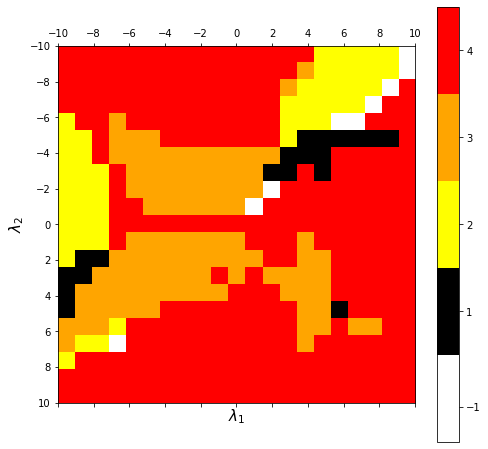

In [98]:
from matplotlib.colors import ListedColormap
import matplotlib as mpl
allcolors = ['w', 'k', 'yellow', 'orange', 'red']
cmap = ListedColormap(allcolors)
norm = mpl.colors.BoundaryNorm([-2.,.5,1.5,2.5,3.5,4.5], cmap.N, cmap.N)
# norm = mpl.colors.BoundaryNorm(np.arange(-1.5,5), cmap.N, cmap.N)

fig, ax = plt.subplots(figsize=(8,8))
scatter = ax.matshow(stabmat, cmap=cmap, norm=norm, extent=[-10,10,10,-10])

ax.set_xlabel(r"$\lambda_1$", fontsize=15)
ax.set_ylabel(r"$\lambda_2$", fontsize=15)
ax.set_xticks(np.linspace(-10,10,11))
ax.set_yticks(np.linspace(-10,10,11))

fig.colorbar(scatter, ticks=[-1,1,2,3,4])
plt.savefig('Images/fp_stab.png')
plt.show()

In [93]:
np.arange(-1.5,5)

array([-1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5])